In [1]:
import pandas as pd
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,accuracy_score

In [15]:
concrete=pd.read_csv('Concrete_Data.csv')
concrete

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
y=concrete['Strength']
X=concrete.drop('Strength',axis=1)

In [4]:
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

In [5]:
dtr=DecisionTreeRegressor(random_state=23)

In [6]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [7]:
gcv=GridSearchCV(dtr,param_grid=params,cv=kfold,scoring='r2')

In [8]:
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [9]:
gcv.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [10]:
gcv.best_score_

0.8423769153142352

In [11]:
best_model=gcv.best_estimator_
best_model

DecisionTreeRegressor(random_state=23)

In [12]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,Cement,0.362461
1,Blast,0.109381
2,Fly,0.012052
3,Water,0.109188
4,Superplasticizer,0.025574
5,Coarse,0.032468
6,Fine,0.026781
7,Age,0.322095


In [13]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
2,Fly,0.012052
4,Superplasticizer,0.025574
6,Fine,0.026781
5,Coarse,0.032468
3,Water,0.109188
1,Blast,0.109381
7,Age,0.322095
0,Cement,0.362461


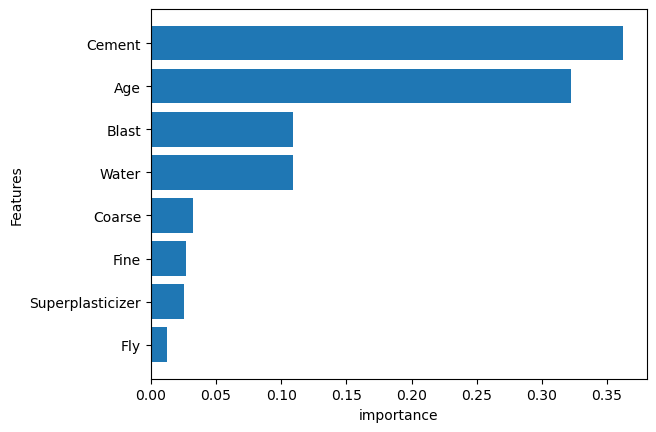

In [14]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()